In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [2]:
turbines = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/gas_turbines.csv")
turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# data exploration

In [3]:
turbines.shape

(15039, 11)

In [4]:
turbines.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
turbines.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
turbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
turbines[turbines.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [9]:
turbines.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [10]:
turbines.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [11]:
turbines[turbines.duplicated()].shape

(0, 11)

In [12]:
turbines.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<Axes: >

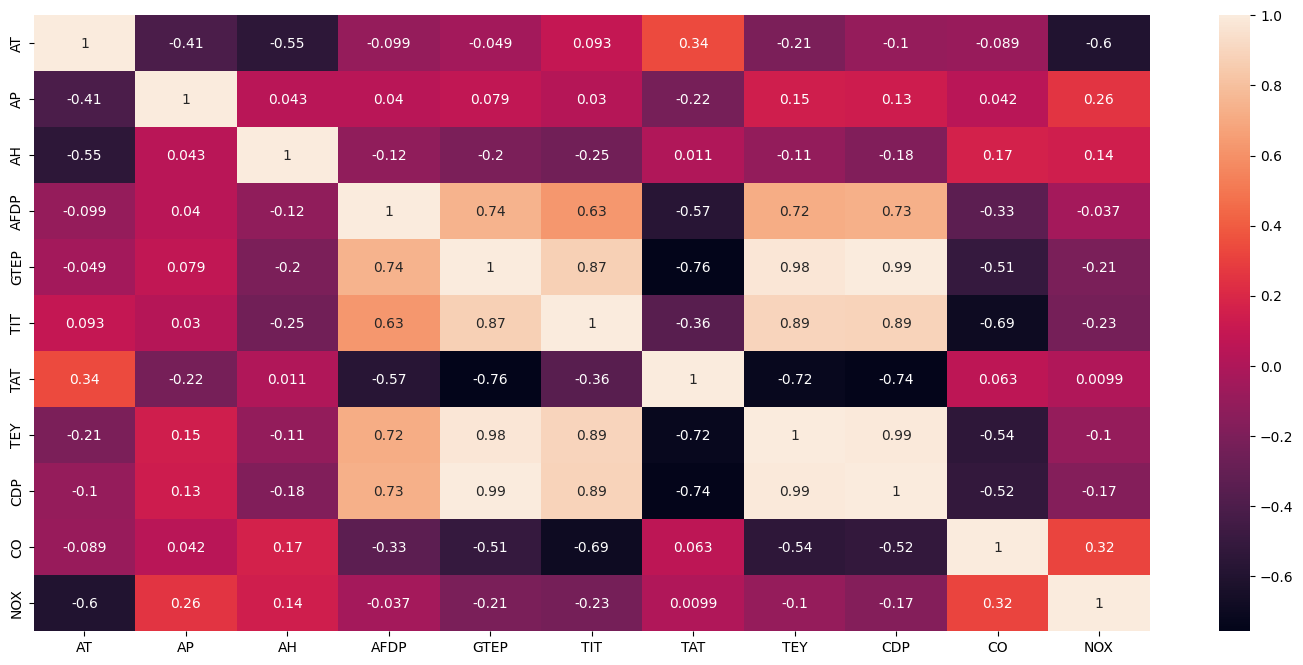

In [13]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(turbines.corr(),annot=True)

<ipython-input-14-22a3ef7fc8f8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(turbines[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


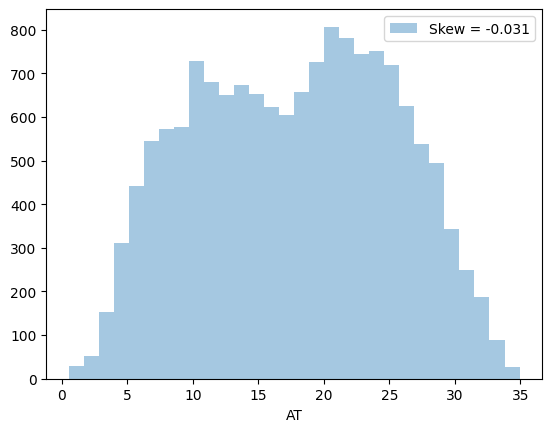

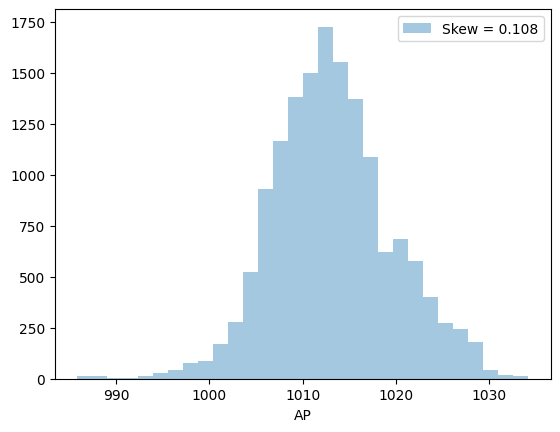

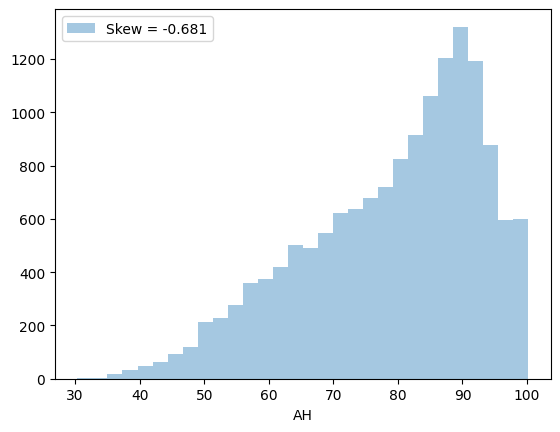

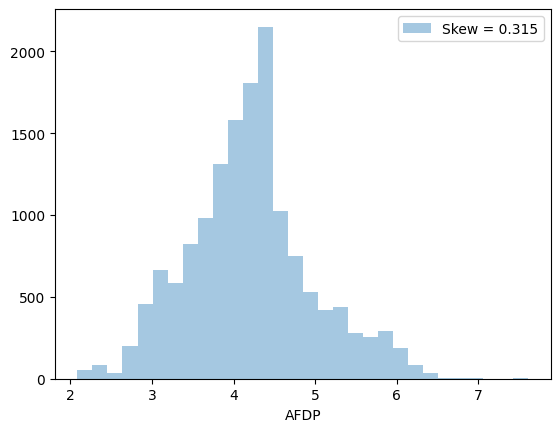

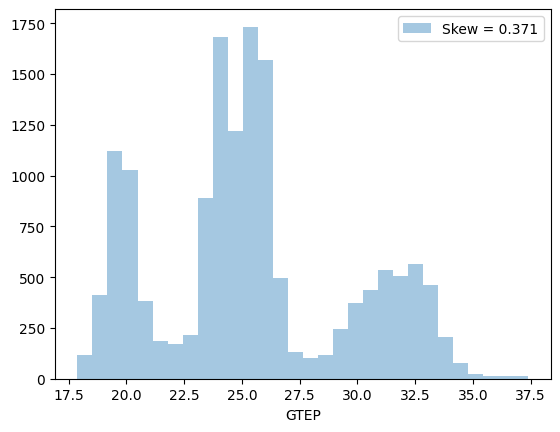

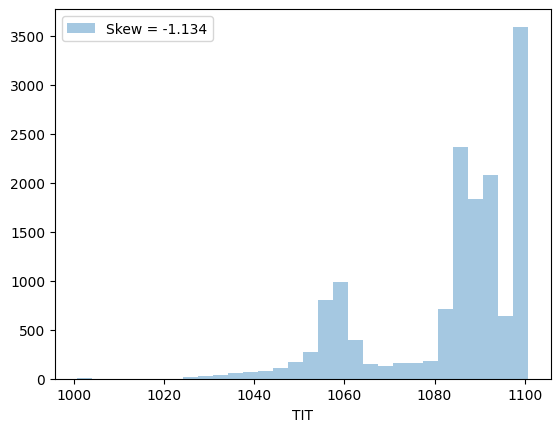

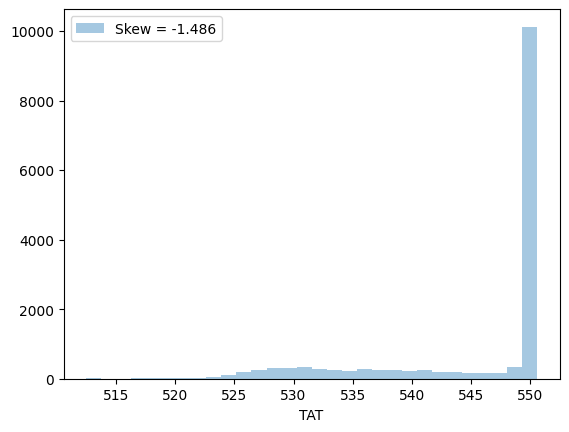

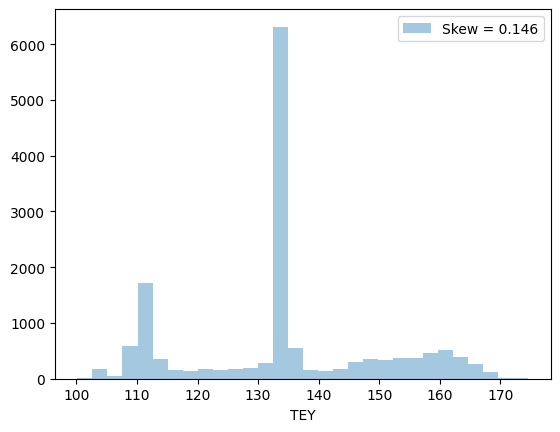

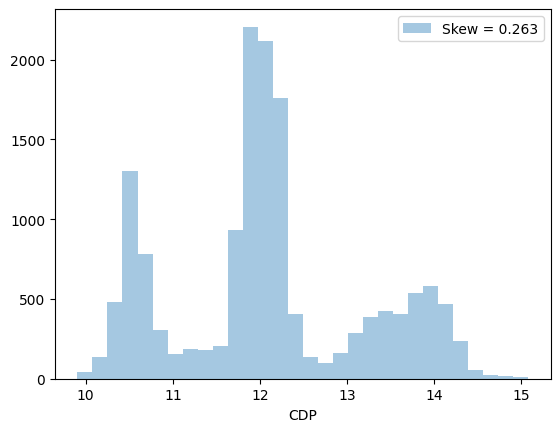

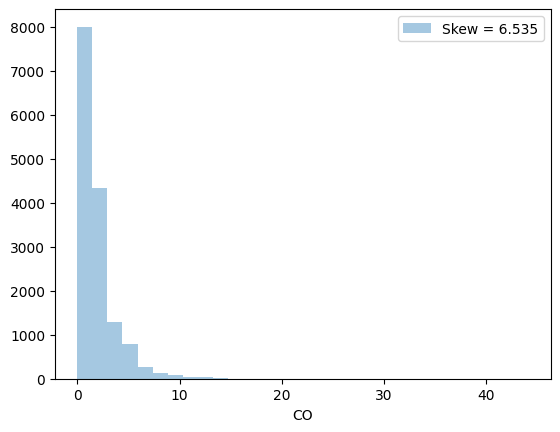

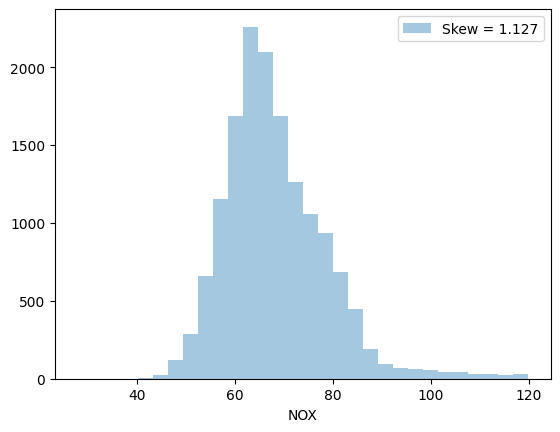

In [14]:
# univariate plots

numerical_features=[feature for feature in turbines.columns if turbines[feature].dtypes != 'O']
for feat in numerical_features:
    skew = turbines[feat].skew()
    sns.distplot(turbines[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [15]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

In [16]:
import warnings
warnings.filterwarnings('ignore')

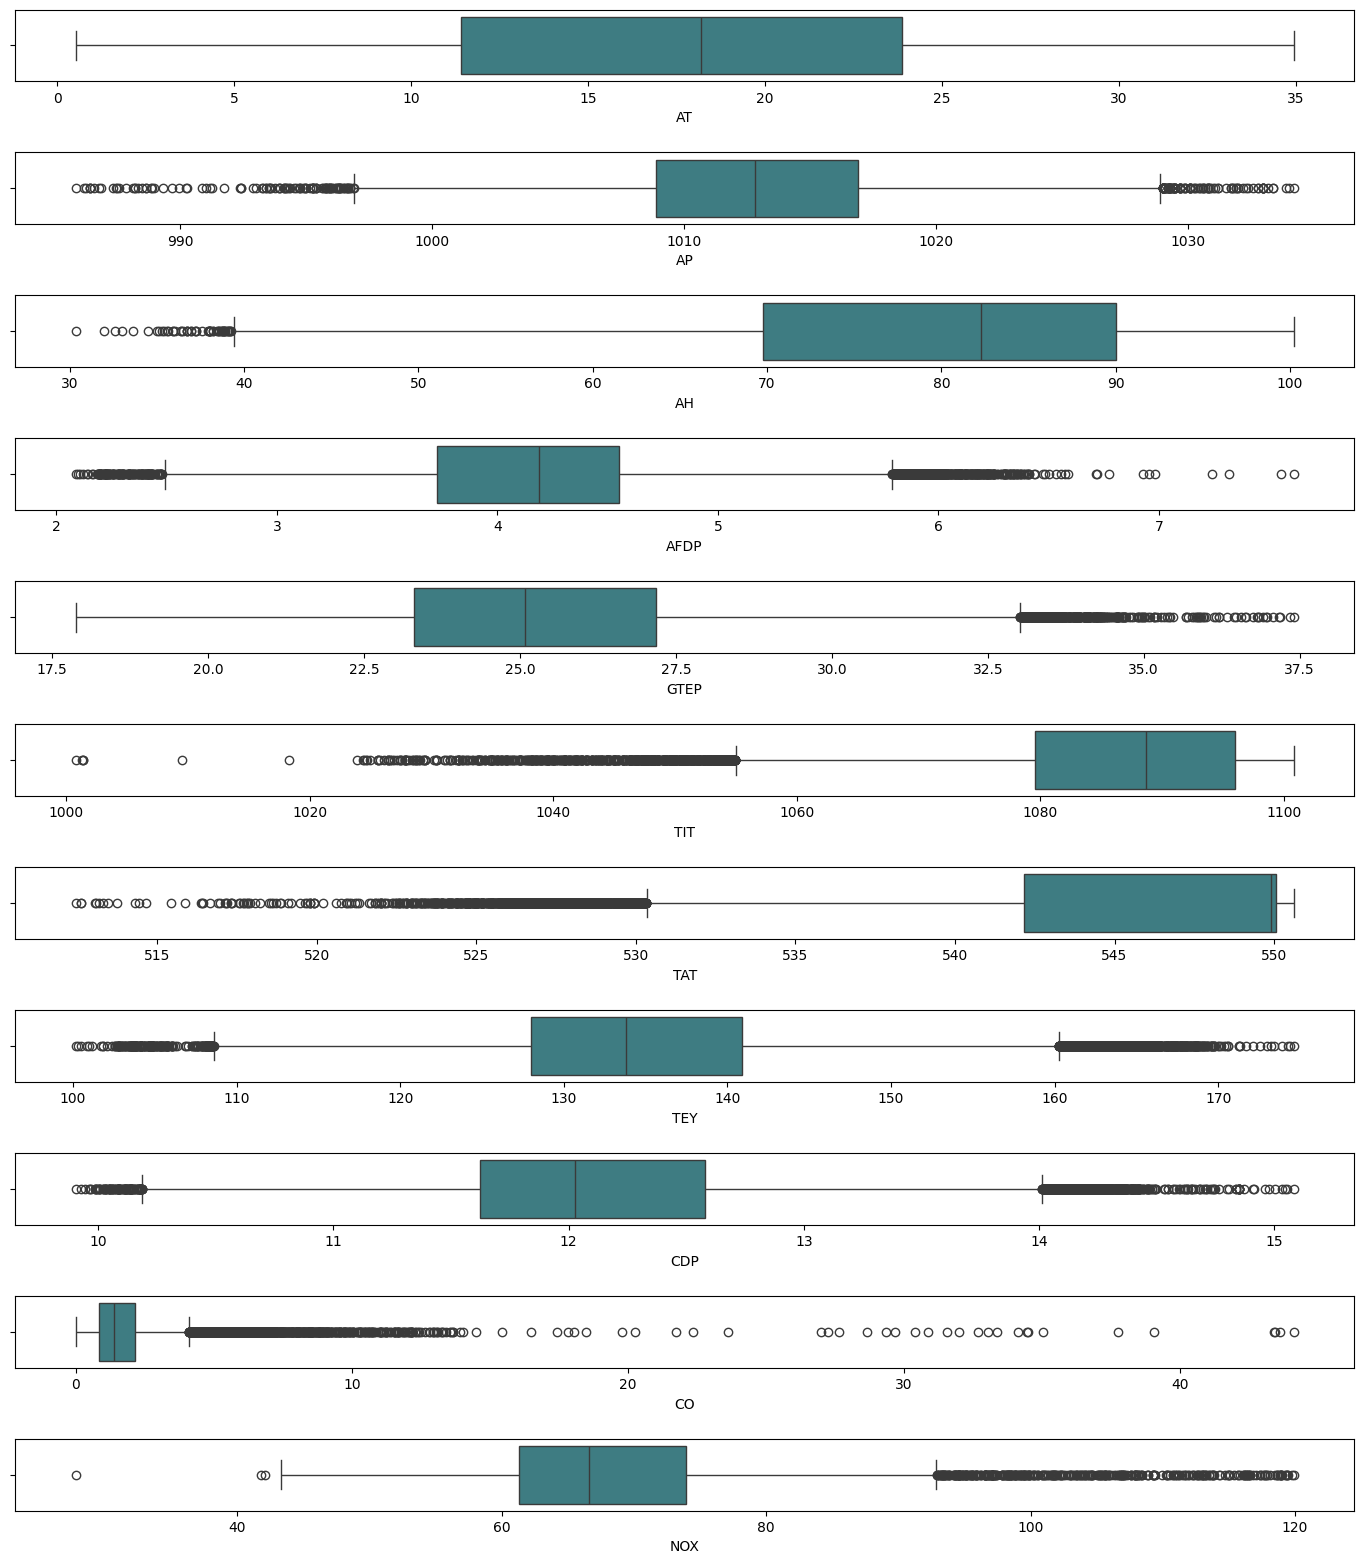

In [17]:
df=turbines.copy()
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=df,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=df,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=df,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=df,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=df,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=df,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=df,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

except AT, remaining all variables have outliers in the maximum quantity

# log transformation

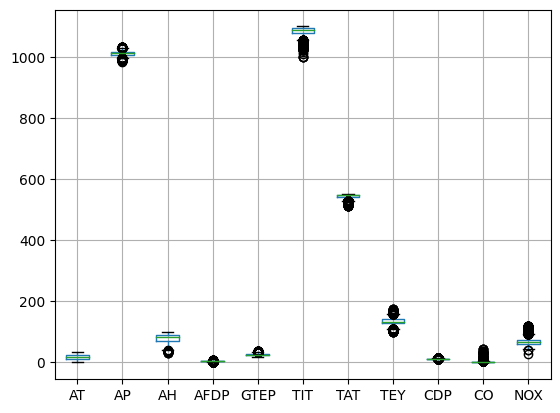

In [18]:
data=turbines.copy()

data.boxplot()

plt.show()

At insights using visualization

Skew: -0.030710466602760514
Kurtosis: -0.987597300486351


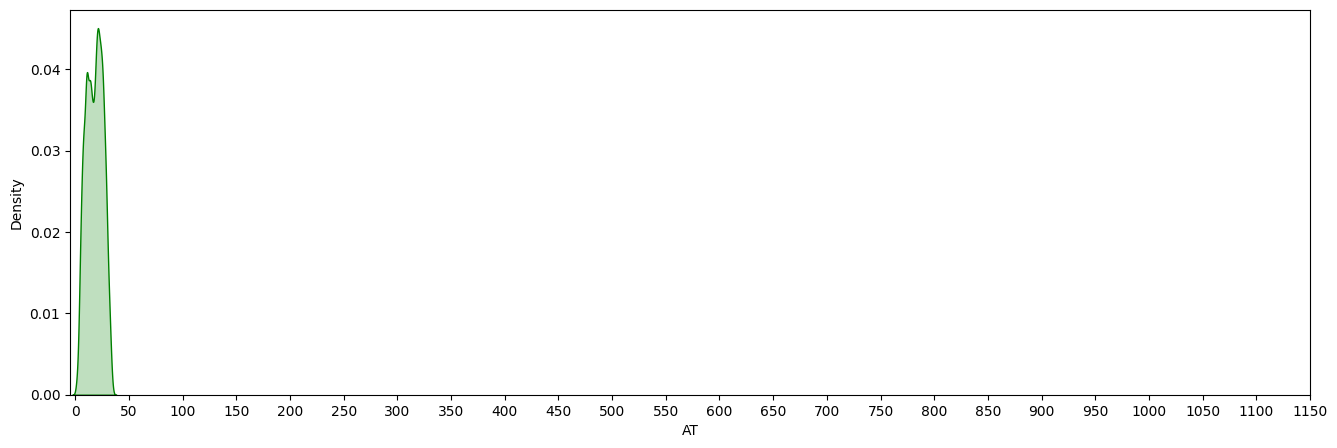

In [19]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(turbines["AT"].skew()))
print("Kurtosis: {}".format(turbines['AT'].kurtosis()))
ax = sns.kdeplot(turbines['AT'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

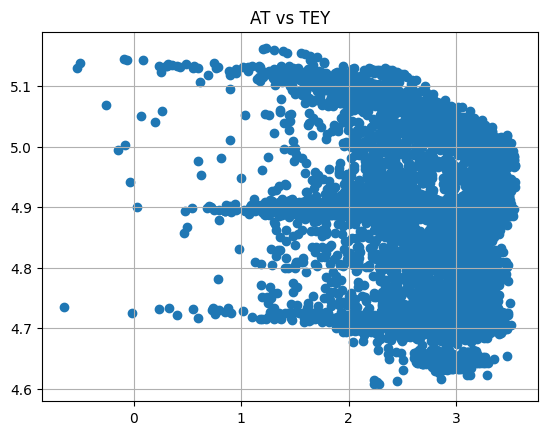

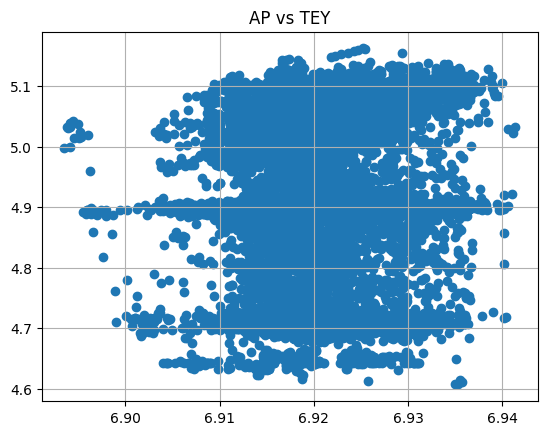

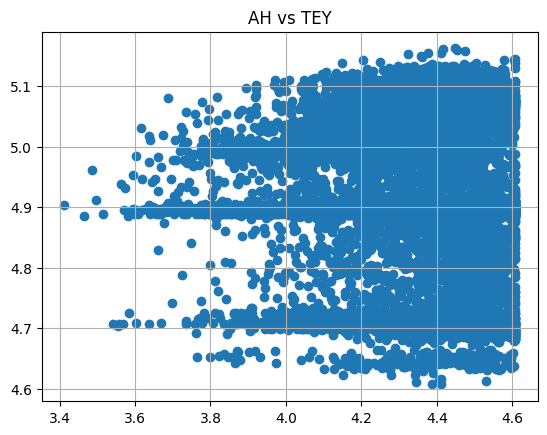

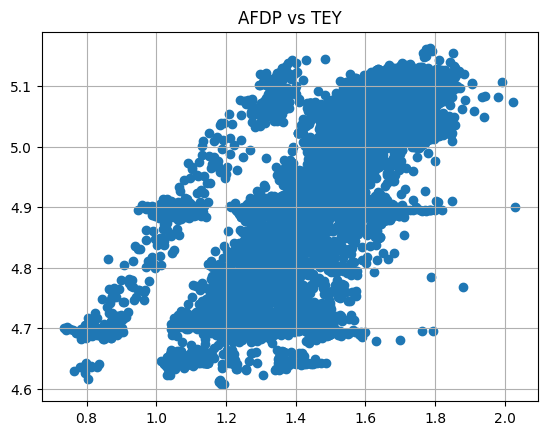

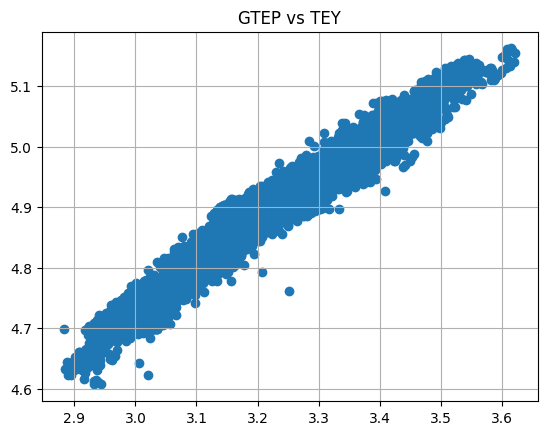

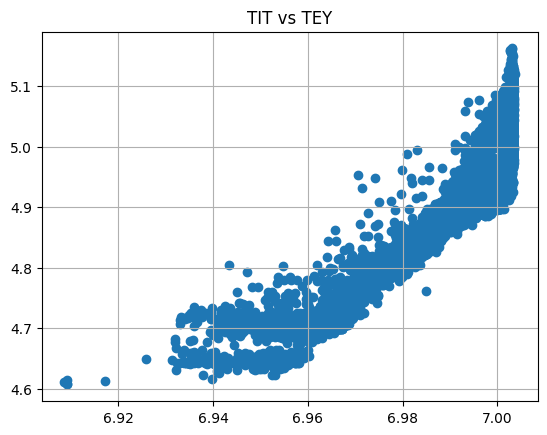

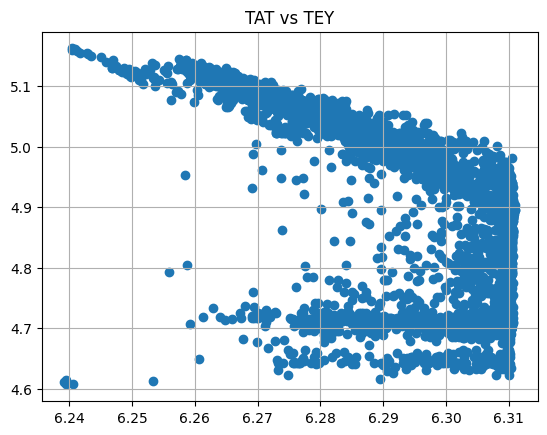

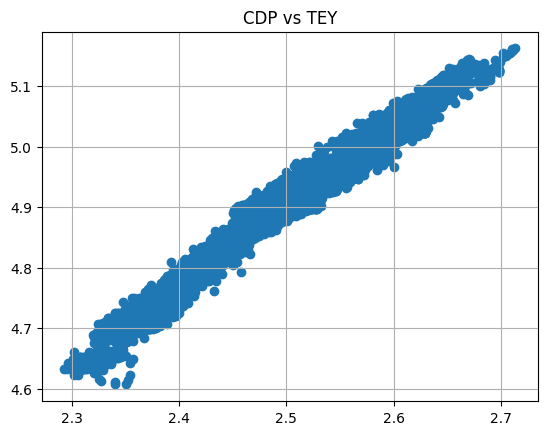

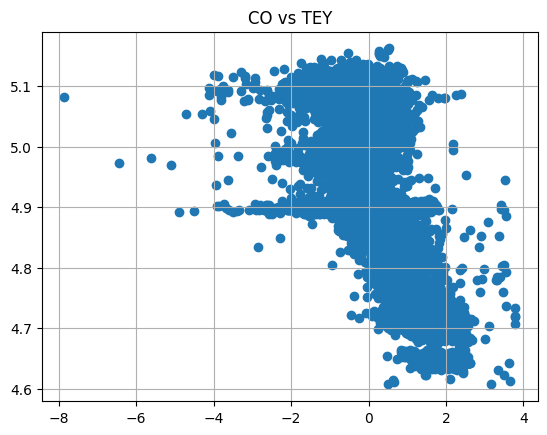

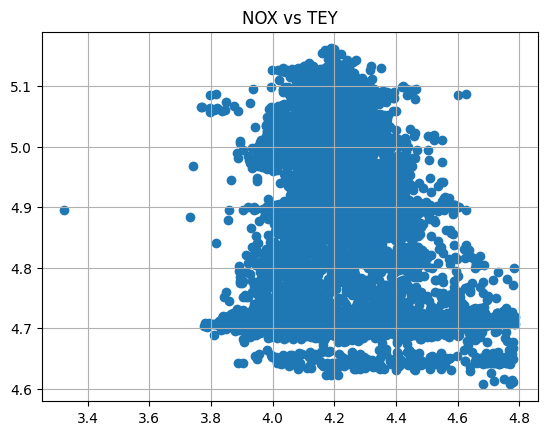

In [20]:
## multivariate analysis


for i in turbines.columns:
    if i!="TEY":
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

In [21]:
x=turbines.drop(columns="TEY")
y=turbines[["TEY"]]

In [22]:
## FEAture selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from numpy import set_printoptions
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [23]:
scores = fit.scores_

features = fit.transform(x)

In [24]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.714061,CDP
4,1.600751,GTEP
5,1.325004,TIT
6,0.897241,TAT
3,0.660192,AFDP
8,0.512757,CO
0,0.412200,AT
9,0.301008,NOX
1,0.137319,AP
2,0.097798,AH


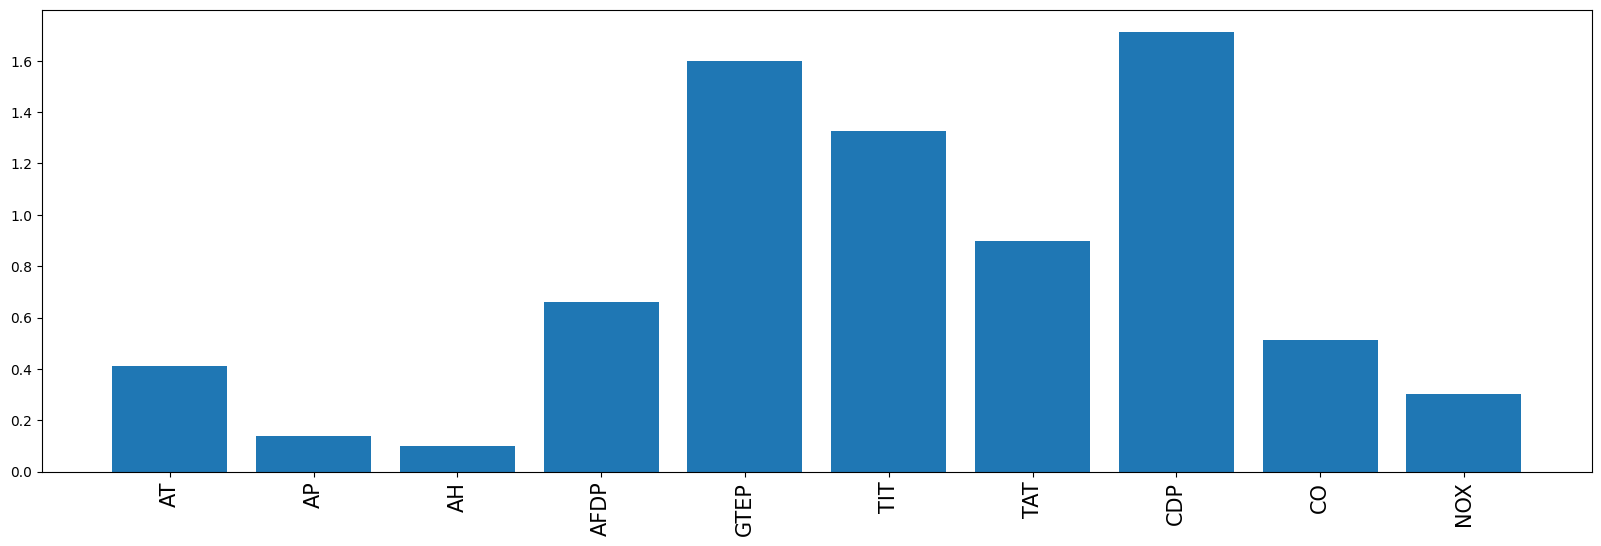

In [25]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

In [26]:
score_df.sort_values("Score",ascending=False)

,Score,Feature
7,1.714061,CDP
4,1.600751,GTEP
5,1.325004,TIT
6,0.897241,TAT
3,0.660192,AFDP
8,0.512757,CO
0,0.412200,AT
9,0.301008,NOX
1,0.137319,AP
2,0.097798,AH


# data preproceesing

In [27]:
data=turbines[["CDP","GTEP","TIT","TAT","AFDP","CO","AT","TEY"]]

In [28]:

continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [29]:
data_scaled =data.copy()
features = data_scaled[continuous_feature]

In [30]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled[continuous_feature] = scaler.fit_transform(features.values)
data_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [31]:
x=data_scaled.drop(columns="TEY")
y=data_scaled[["TEY"]]

In [32]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# hyperparameter tuning: optimal learning rate, number of layers, neurons

In [33]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [34]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.1 MB/s eta 0:00:00


In [35]:
from kerastuner.tuners import RandomSearch
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV,KFold
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [36]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [37]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')
tuner.results_summary()

Results summary
Results in project/Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")


# hyperparameter tuning: optima batch number , number of epochs

In [38]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [39]:
 !python -m pip install scikeras

In [40]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV,KFold

In [43]:
model1 =KerasRegressor(build_fn=create_model,verbose=10)
batch_size=[10,20,40,50]
epochs=[10,50]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [44]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START batch_size=10, epochs=10....................................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 1/5; 1/8] END .....batch_size=10, epochs=10;, score=0.997 total time=  23.5s
[CV 2/5; 1/8] START batch_size=10, epochs=10....................................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 2/5; 1/8] END .....batch_size=10, epochs=10;, score=0.998 total time=  26.5s
[CV 3/5; 1/8] START batch_size=10, epochs=10....................................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 3/5; 1/8] END .....batch_size=10, epochs=10;, score=0.996 total time=  10.4s
[CV 4/5; 1/8] START batch_size=10, epochs=10....................................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4

In [45]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.997817729025132, using {'batch_size': 40, 'epochs': 50}
0.996849978100497,0.0006735453417710511 with {'batch_size': 10, 'epochs': 10}
0.9951909514498164,0.0035690709525470227 with {'batch_size': 10, 'epochs': 50}
0.9959504902227536,0.0028382868429166564 with {'batch_size': 20, 'epochs': 10}
0.9972814489363664,0.0006388012043042677 with {'batch_size': 20, 'epochs': 50}
0.9960915264297411,0.0021014628287868253 with {'batch_size': 40, 'epochs': 10}
0.997817729025132,0.0003596526947189811 with {'batch_size': 40, 'epochs': 50}
0.9963645198222378,0.0014634754666010305 with {'batch_size': 50, 'epochs': 10}
0.9962808069284673,0.001833706661599552 with {'batch_size': 50, 'epochs': 50}


# hyperparameter tuning: optimal dropout rate

In [46]:
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV,KFold
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from keras.models import Sequential, load_model
from keras.layers import Dense

In [62]:

def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=18,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.01)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [63]:
model2=KerasRegressor(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.1,0.2,0.3]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [64]:
grid2.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__model', 'estimator__build_fn', 'estimator__warm_start', 'estimator__random_state', 'estimator__optimizer', 'estimator__loss', 'estimator__metrics', 'estimator__batch_size', 'estimator__validation_batch_size', 'estimator__verbose', 'estimator__callbacks', 'estimator__validation_split', 'estimator__shuffle', 'estimator__run_eagerly', 'estimator__epochs', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [ ]:
grid_result2 = grid2.fit(x_test,y_test)

In [ ]:
## hyperparameter tuning

In [66]:

def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))
    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [67]:

model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
param_grid=dict(activation_function=['softmax','tanh','relu'],init=['normal','uniform','zero'])
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid_result3 = grid3.fit(x_test,y_test)

In [ ]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

# model building neural networks

In [69]:
data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [70]:
#assigning predictor variables to x and response variable to y
x = data.drop('TEY', axis=1)
y = data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

#for removing heading from y_test
#y_test = y_test.values

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [71]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)


Epoch 1/100
169/169 [==============================] - 1s 4ms/step - loss: 17620.0625 - mae: 131.7837 - mse: 17620.0625 - val_loss: 16776.7891 - val_mae: 128.5648 - val_mse: 16776.7891
Epoch 2/100
169/169 [==============================] - 0s 2ms/step - loss: 16282.5645 - mae: 126.6079 - mse: 16282.5645 - val_loss: 15727.2793 - val_mae: 124.4158 - val_mse: 15727.2793
Epoch 3/100
169/169 [==============================] - 1s 4ms/step - loss: 15309.6348 - mae: 122.7060 - mse: 15309.6348 - val_loss: 14810.8633 - val_mae: 120.6768 - val_mse: 14810.8633
Epoch 4/100
169/169 [==============================] - 1s 3ms/step - loss: 14426.5225 - mae: 119.0510 - mse: 14426.5225 - val_loss: 13959.4434 - val_mae: 117.0960 - val_mse: 13959.4434
Epoch 5/100
169/169 [==============================] - 1s 4ms/step - loss: 13598.6367 - mae: 115.5259 - mse: 13598.6367 - val_loss: 13156.0137 - val_mae: 113.6136 - val_mse: 13156.0137
Epoch 6/100
169/169 [==============================] - 1s 4ms/step - loss: 

In [73]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable


94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    97.87368
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.569731
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.623117
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    80.909371
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.07926
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.662285
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 15 - epochs: 5 Accuracy: TEY    58.840495
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 15 - epochs: 10 Accuracy: TEY    89.853227
dtype: float64
94/94 [=================

,batchsize,epochs,Accuracy
0,5,5,TEY 97.87368 dtype: float64
0,5,10,TEY 99.569731 dtype: float64
0,5,50,TEY 99.623117 dtype: float64
0,10,5,TEY 80.909371 dtype: float64
0,10,10,TEY 98.07926 dtype: float64
0,10,50,TEY 99.662285 dtype: float64
0,15,5,TEY 58.840495 dtype: float64
0,15,10,TEY 89.853227 dtype: float64
0,15,50,TEY 99.605099 dtype: float64
0,20,5,TEY 46.031926 dtype: float64


In [77]:
#Training Model - using best params
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

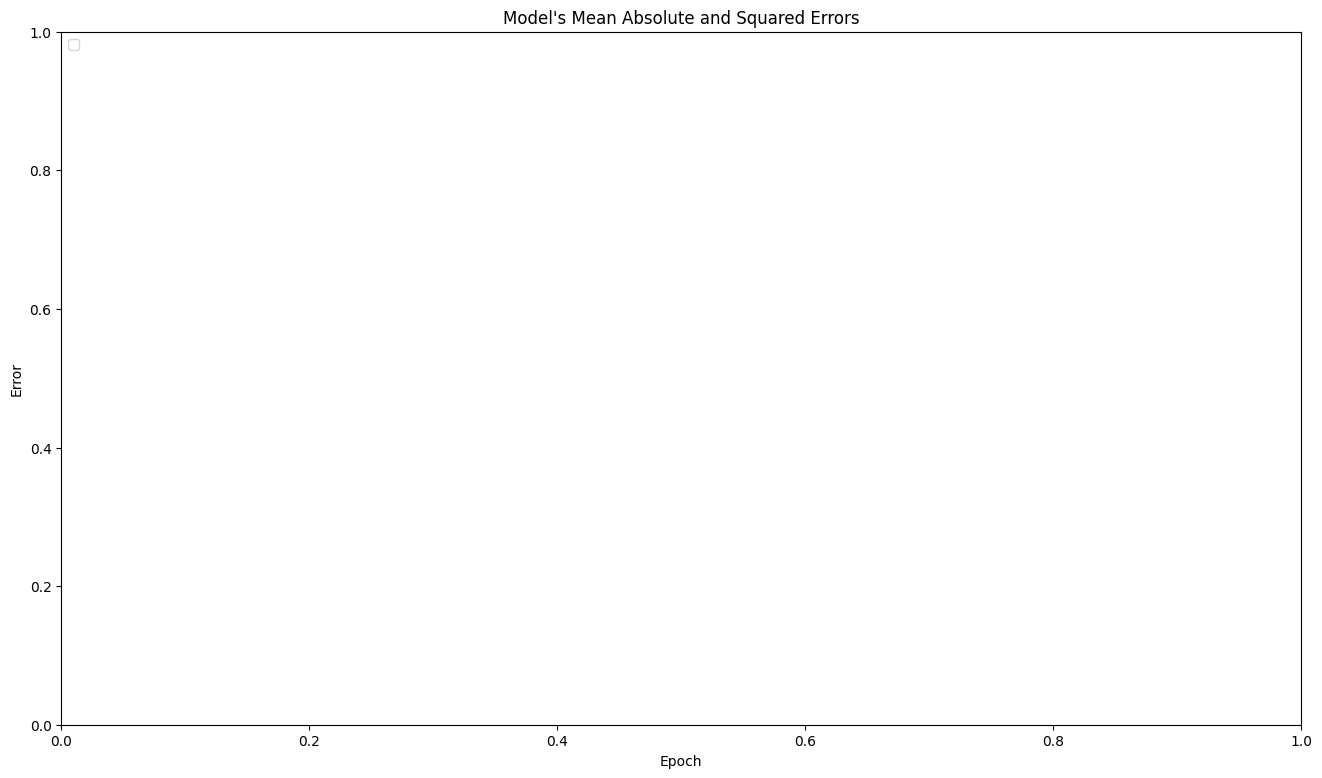

KeyError: 'val_loss'

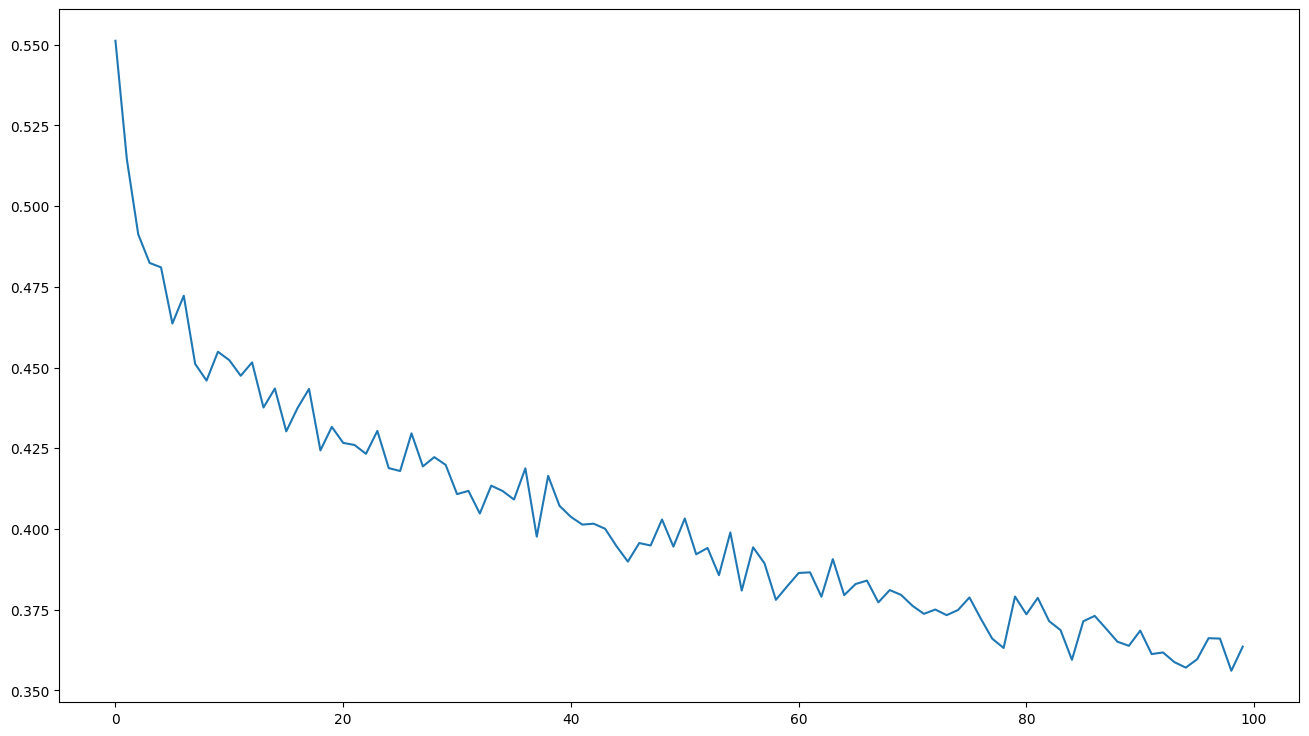

In [80]:
## train and test error
plt.figure(figsize=(16,9))
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()


In [ ]:
## predicting values from model using data set

In [81]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.431335
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.546638
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,133.992416
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,133.759369
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.363968
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,114.430298
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.420746
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.367249
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.649200
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,160.434448


In [82]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

In [83]:
## calculating absolute percent error

In [84]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.67182391646824


,Actual,Predicted,APE %
13312,134.46,134.431335,0.021318
12627,111.88,112.546638,0.595851
6393,133.72,133.992416,0.203721
4990,133.79,133.759369,0.022895
12462,110.77,111.363968,0.536217


In [85]:

predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.431335,0.021318,0.000213
1,111.88,112.546638,0.595851,-0.005959
2,133.72,133.992416,0.203721,-0.002037
3,133.79,133.759369,0.022895,0.000229
4,110.77,111.363968,0.536217,-0.005362
...,...,...,...,...
3003,119.25,119.618942,0.309386,-0.003094
3004,133.74,133.775192,0.026314,-0.000263
3005,146.31,146.119629,0.130115,0.001301
3006,150.07,148.980240,0.726168,0.007262


In [86]:
## visulizing the actuala dn predicted values

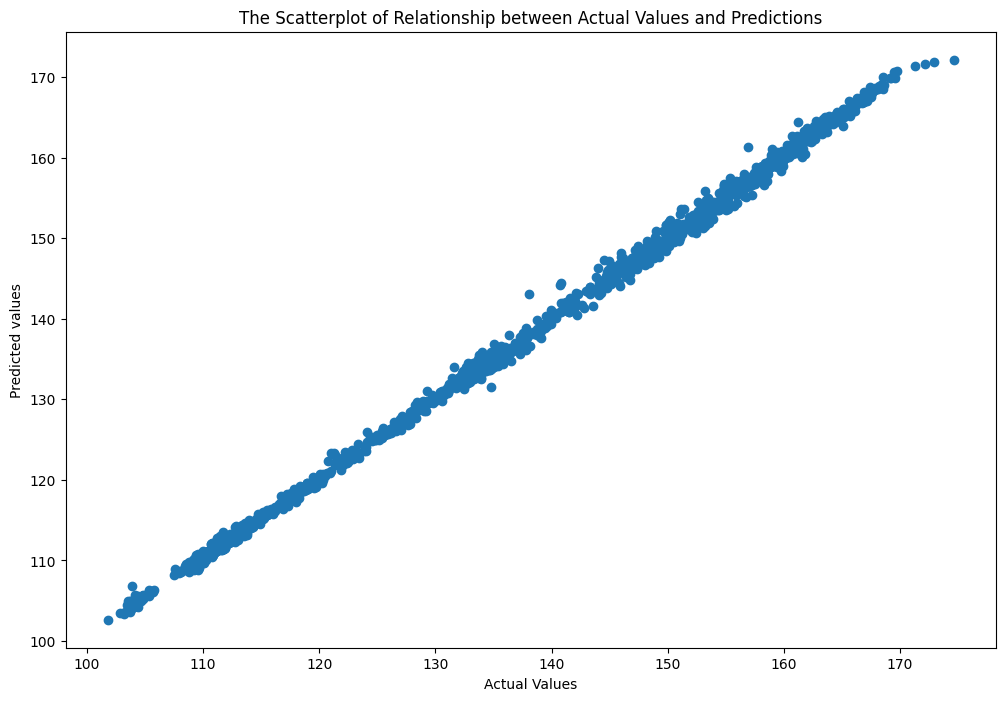

In [87]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [88]:
## model performance calculation

In [89]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.4377056914187494
MSE: 0.361070690425262
RMSE: 0.6008915795925768


In [90]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))

This shows our model predict % 99.87 of the target correctly


 # residual analysis

<Axes: ylabel='Density'>

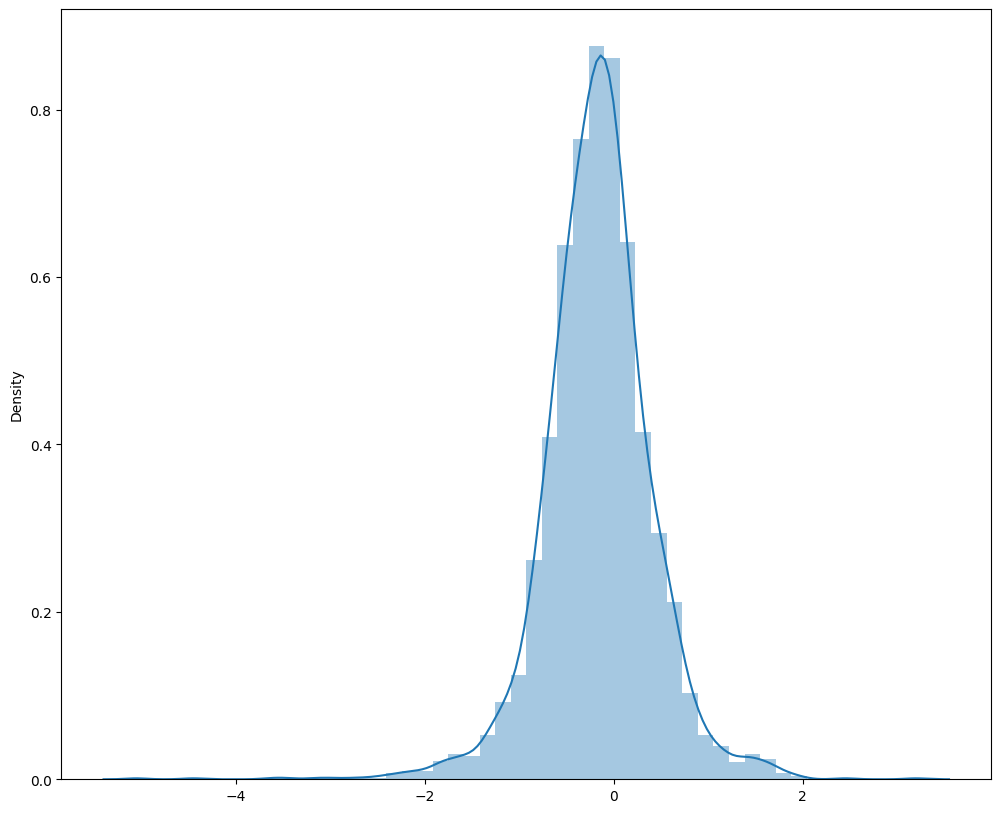

In [91]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data

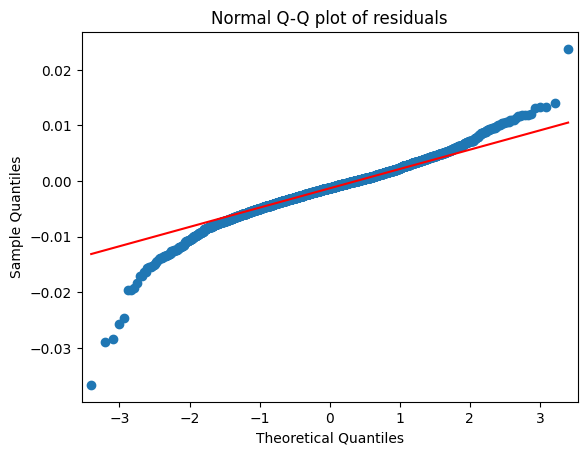

In [92]:
#Residuals values  = y - yhat
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()